<a href="https://colab.research.google.com/github/Ankit-kumar-7696/ds_Ankit-Kumar/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index (1).csv to fear_greed_index (1) (2).csv


In [42]:
df_sentiment = pd.read_csv("fear_greed_index (1).csv")

In [39]:
from google.colab import files
uploaded = files.upload()

Saving historical_data (1).csv to historical_data (1) (1).csv


In [44]:
## Load the Dataset

df_trader = pd.read_csv("historical_data (1).csv")


In [45]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [46]:
df_trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

## Data Preprocessing

In [47]:
df_trader

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [48]:
df_sentiment

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [49]:
## check null values
df_trader.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [50]:
df_sentiment.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [51]:
## check columns
df_sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [52]:
df_trader.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [53]:
# convert the timestamp into proper datetime function or datatype

df_trader['Timestamp IST'] = pd.to_datetime(df_trader['Timestamp IST'], dayfirst=True, errors='coerce')

In [54]:
df_trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [55]:
## create a new column = "date"

df_trader['date'] = df_trader['Timestamp IST'].dt.date

In [56]:
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_sentiment['date'] = df_sentiment['date'].dt.date

#### Clean and enrich the Sentiment data

In [57]:
# Map classification and preserve numeric score
df_sentiment['sentiment_class'] = df_sentiment['classification'].map({'Fear': 0, 'Greed': 1})
df_sentiment['sentiment_score'] = pd.to_numeric(df_sentiment['value'], errors='coerce')

###### Merging the dataset on date

In [58]:
merged_df = pd.merge(df_trader, df_sentiment[['date', 'sentiment_class', 'sentiment_score']], on='date', how='inner')

In [59]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment_class,sentiment_score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,NaN,80
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,NaN,80
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,NaN,80
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,NaN,80
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,NaN,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,1.0,60
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,1.0,60
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,1.0,60
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,1.0,60


In [60]:
merged_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [61]:
merged_df.dropna(inplace = True)

In [62]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment_class,sentiment_score
224,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63005,28.7,18.08,BUY,2025-03-18 12:50:00,350000.0,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.006074,8.210000e+14,1.740000e+12,2025-03-18,0.0,34
225,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63007,3072.9,1936.14,BUY,2025-03-18 12:50:00,350028.7,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.650543,6.870000e+13,1.740000e+12,2025-03-18,0.0,34
226,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63007,2724.5,1716.63,BUY,2025-03-18 12:50:00,353101.6,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.576786,3.790000e+14,1.740000e+12,2025-03-18,0.0,34
227,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63029,1568.6,988.67,BUY,2025-03-18 12:50:00,355826.1,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.332193,4.410000e+14,1.740000e+12,2025-03-18,0.0,34
228,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.63046,1473.6,929.05,BUY,2025-03-18 12:50:00,357394.7,Open Long,0.0,0x7b46ccfbc6de6d29ed63041fc7608b01bc00943d76ed...,80499480660,True,0.312159,9.660000e+14,1.740000e+12,2025-03-18,0.0,34


In [63]:
merged_df['sentiment_class'].value_counts()

,count
sentiment_class,
0.0,61837
1.0,50303


In [64]:
merged_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


# Analyse Result

1. PnL Summary by Market Sentiment

In [65]:
summary = merged_df.groupby('sentiment_class')['Closed PnL'].agg(['mean', 'median', 'std', 'count']).rename(index={0:'Fear', 1:'Greed'})
print("Closed PnL Summary:")
print(summary)

Closed PnL Summary:
                      mean  median          std  count
sentiment_class                                       
Fear             54.290400     0.0   935.355438  61837
Greed            42.743559     0.0  1116.028390  50303


2. PnL Distribution

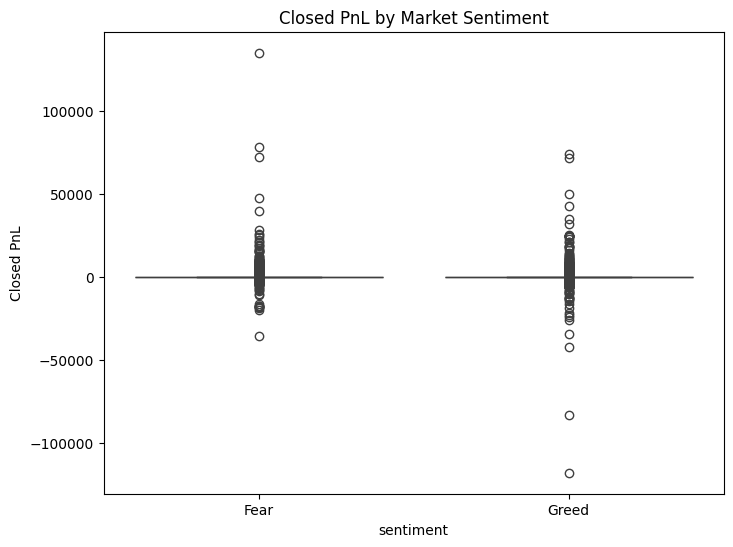

In [66]:
## Boxplot of Closed PnL

plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_class', y='Closed PnL', data=merged_df)
plt.xticks([0, 1], ['Fear', 'Greed'])
plt.title('Closed PnL by Market Sentiment')
plt.xlabel('sentiment')
plt.ylabel('Closed PnL')
plt.show()

3. Trade Side Distribution by Sentiment

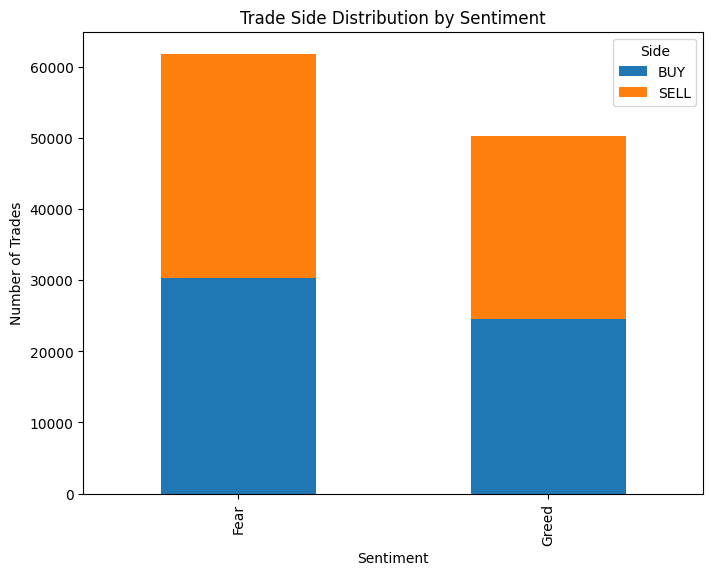

In [67]:
## Trade Side Distribution by Sentiment

side_dist = merged_df.groupby(['sentiment_class', 'Side']).size().unstack().fillna(0)
side_dist.index = ['Fear', 'Greed']
side_dist.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Trade Side Distribution by Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Sentiment')
plt.show()

4. Top Performing Accounts by Sentiment.

In [68]:
## count Performance and its Differenti

account_stats = merged_df.groupby(['Account', 'sentiment_class'])['Closed PnL'].sum().unstack()
account_stats.columns = ['Fear_PnL', 'Greed_PnL']
account_stats['Diff'] = account_stats['Greed_PnL'] - account_stats['Fear_PnL']
account_stats = account_stats.dropna()
account_stats.sort_values(by='Diff', ascending=False).head(10)

,Fear_PnL,Greed_PnL,Diff
Account,,,
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,-58219.752261,453595.318176,511815.070437
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,93165.161357,534058.236330,440893.074973
0x430f09841d65beb3f27765503d0f850b8bce7713,5615.052102,227680.491734,222065.439632
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,55978.796960,243399.513140,187420.716180
0x4f93fead39b70a1824f981a54d4e55b278e9f760,-19126.158064,79023.471493,98149.629557
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,-16719.913714,44169.810737,60889.724451
0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,-621.545060,60254.251561,60875.796621
0x8381e6d82f1affd39a336e143e081ef7620a3b7f,258.415330,57108.911300,56850.495970
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,49364.275663,95937.394195,46573.118532


5. Average Daily PnL by Sentiment

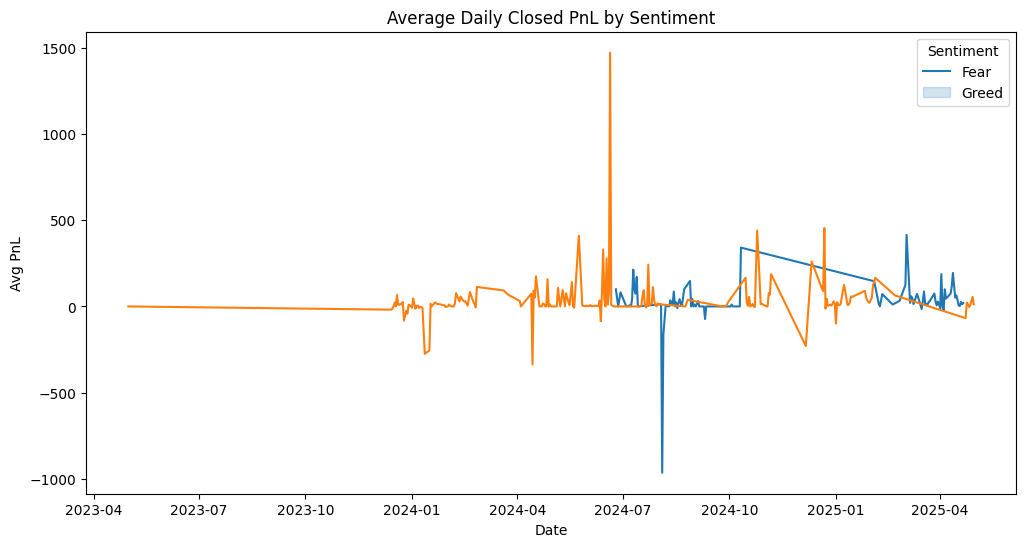

In [69]:
## Time Series: Avg Daily PnL & Sentiment Score

daily_avg = merged_df.groupby(['date', 'sentiment_class'])['Closed PnL'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Closed PnL', hue='sentiment_class', data=daily_avg)
plt.legend(title='Sentiment', labels=['Fear', 'Greed'])
plt.title('Average Daily Closed PnL by Sentiment')
plt.xlabel('Date')
plt.ylabel('Avg PnL')
plt.show()

6. Sentiment Score vs Closed PnL

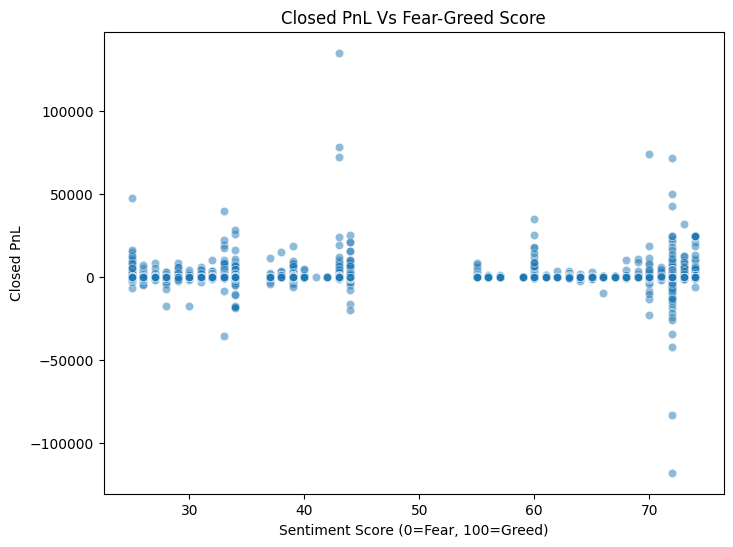

Correlation between Sentiment Score and PnL: -0.000


In [70]:
## Sentiment Score vs PnL Correlation (scatter)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='sentiment_score', y='Closed PnL', alpha=0.5)
plt.title('Closed PnL Vs Fear-Greed Score')
plt.xlabel('Sentiment Score (0=Fear, 100=Greed)')
plt.ylabel('Closed PnL')
plt.show()

correlation = merged_df[['Closed PnL', 'sentiment_score']].corr().iloc[0,1]
print(f"Correlation between Sentiment Score and PnL: {correlation:.3f}")

## **Key Insights:**

**1.Closed PnL Distribution by Market Sentiment:**
This boxplot shows how trader profits vary under different market sentiment regimes. While most trades cluster around zero, there are significant outliers both during Fear and Greed.


**2. Trade Side Distribution by Sentiment:**
The bar chart compares the number of BUY vs SELL trades under each sentiment. Fear days saw a higher volume of trades overall.


**3. Average Daily Closed PnL by Sentiment:**
This time series plot highlights fluctuations in daily average PnL, with visible divergence in performance trends during sentiment shifts.


**4. Closed PnL vs Sentiment Score:**
This scatterplot shows the relationship between sentiment score (0 = Fear, 100 = Greed) and PnL. A wide spread and lack of clustering indicate a weak correlation overall.
